In [81]:
import nltk
import numpy
import pandas as pd
import string
import csv
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [82]:
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/album_details.csv") 
print(df)

      Unnamed: 0       id          singer_name  \
0              0   5765.0  Taylor Swift Lyrics   
1              1   6432.0  Taylor Swift Lyrics   
2              2   6995.0  Taylor Swift Lyrics   
3              3  10358.0  Taylor Swift Lyrics   
4              4  24353.0  Taylor Swift Lyrics   
...          ...      ...                  ...   
1814        1814  22624.0    Jason Mraz Lyrics   
1815        1815  32642.0    Jason Mraz Lyrics   
1816        1816  58384.0    Jason Mraz Lyrics   
1817        1817  81696.0    Jason Mraz Lyrics   
1818        1818      NaN    Jason Mraz Lyrics   

                                                   name         type  \
0                                          Taylor Swift        album   
1     Sounds Of The Season: The Taylor Swift Holiday...           EP   
2                                              Fearless        album   
3                                             Speak Now        album   
4                                      

In [83]:
#Stop word removal(gereksiz/sık kullanılan kelimelerin çıkarılması) işlemi Yapıldı
nltk.download("stopwords")

stop_words = set(stopwords.words('turkish'))

stop_words_list = list(stop_words)

print(" İlk 50 Türkçe stopword:")
print(stop_words_list[:50])

 İlk 50 Türkçe stopword:
['o', 'acaba', 'az', 'neden', 'hepsi', 'de', 'bu', 'çok', 'kim', 'ne', 'nerde', 'defa', 'kez', 'mu', 've', 'ama', 'daha', 'her', 'nasıl', 'ise', 'biri', 'ki', 'mı', 'sanki', 'şey', 'nerede', 'veya', 'en', 'eğer', 'hem', 'ile', 'aslında', 'da', 'hep', 'şu', 'mü', 'tüm', 'için', 'diye', 'yani', 'siz', 'biz', 'birşey', 'ya', 'belki', 'bazı', 'niçin', 'hiç', 'niye', 'çünkü']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
import nltk
import string
from nltk.tokenize import sent_tokenize

# Gerekli NLTK paketi indiriliyor
nltk.download('punkt')

# Noktalama karakterlerini kaldırmak için çeviri tablosu
translator = str.maketrans('', '', string.punctuation)

# Her tweeti cümlelere ayır ve noktalama işaretlerini kaldır
def split_and_clean_sentences(text):
    sentences = sent_tokenize(text)  # Cümlelere ayırıyor
    cleaned = [s.translate(translator) for s in sentences]  # Noktalamayı kaldırıyor
    return cleaned

# 'singer_name' yerine doğru sütunu kullanın (örneğin, 'tweet' veya 'text' gibi)
df['sentences'] = df['singer_name'].apply(split_and_clean_sentences)

# İlk 20 satırın cümlelerini yazdır
print(df['sentences'].head(20))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [Taylor Swift Lyrics]
1      [Taylor Swift Lyrics]
2      [Taylor Swift Lyrics]
3      [Taylor Swift Lyrics]
4      [Taylor Swift Lyrics]
5      [Taylor Swift Lyrics]
6      [Taylor Swift Lyrics]
7      [Taylor Swift Lyrics]
8      [Taylor Swift Lyrics]
9     [Ariana Grande Lyrics]
10    [Ariana Grande Lyrics]
11    [Ariana Grande Lyrics]
12    [Ariana Grande Lyrics]
13    [Ariana Grande Lyrics]
14    [Ariana Grande Lyrics]
15    [Ariana Grande Lyrics]
16    [Ariana Grande Lyrics]
17    [Nelly Furtado Lyrics]
18    [Nelly Furtado Lyrics]
19    [Nelly Furtado Lyrics]
Name: sentences, dtype: object


In [85]:
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

# Gerekli NLTK verileri indiriliyor
nltk.download('punkt')
nltk.download('stopwords')

# Türkçe stopword'ler
stop_words = set(stopwords.words('turkish'))

# Tüm tweetleri tek bir listede cümlelere böl
all_sentences = []
for tweet in df['singer_name']:  # Burada 'singer_name' sütununu kontrol ediyorsunuz
    if pd.notna(tweet):  # NaN olmayanları kontrol et
        tweet_sentences = sent_tokenize(str(tweet))  # Tweeti cümlelere ayır
        all_sentences.extend(tweet_sentences)

# Cümleleri kelimelere ayır ve temizle
filtered_sentences = []
for sentence in all_sentences:
    tokens = word_tokenize(sentence)  # Cümleyi kelimelere ayır
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():  # Sadece harflerden oluşuyorsa
            token_lower = token.lower()  # Küçük harfe dönüştür
            if token_lower not in stop_words:  # Stop word değilse
                filtered_tokens.append(token_lower)
    filtered_sentences.append(filtered_tokens)

# İlk 10 temizlenmiş cümleyi yazdır
print(filtered_sentences[:10])


[['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['taylor', 'swift', 'lyrics'], ['ariana', 'grande', 'lyrics']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Lemmatization İşlemi Yapılmıştır
# Gerekli NLTK verileri indiriliyor
nltk.download('punkt')
nltk.download('wordnet')

# Lemmatizer'ı başlat
lemmatizer = WordNetLemmatizer()

# Tweetlerden tüm cümleleri almak
all_sentences = []
for tweet in df['singer_name']:
    if pd.notna(tweet):  # NaN olmayanları kontrol et
        all_sentences.append(str(tweet))

# Sadece lemmatization işlemi
tokenized_corpus_lemmatized = []
for sentence in all_sentences:
    tokens = word_tokenize(sentence)
    
    # Lemmatize et
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Lemmatize edilmiş tokenleri cümle olarak ekle
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

# İlk 10 cümleyi yazdır
print(tokenized_corpus_lemmatized[:10])

# Lemmatize edilmiş cümleleri CSV dosyasına kaydetme
with open("lemmatized_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her cümleyi bir satır olarak yaz
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])  # Her kelimeyi bir araya getirip bir satıra yaz

print("Lemmatize edilmiş cümleler 'lemmatized_sentences.csv' dosyasına kaydedildi.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Taylor', 'Swift', 'Lyrics'], ['Ariana', 'Grande', 'Lyrics']]
Lemmatize edilmiş cümleler 'lemmatized_sentences.csv' dosyasına kaydedildi.


In [86]:
#Stemming İşlemi Yapılmıştır
# Stemmer'ı başlat
stemmer = PorterStemmer()

# Stem'lenmiş cümleleri saklamak için boş liste
tokenized_corpus_stemmed = []

# Filtrelenmiş her cümle (token listesi) için
for filtered_tokens in filtered_sentences:
    stemmed_tokens = []  # Stem'lenmiş token'ları saklamak için boş liste ekler
    for token in filtered_tokens:
        stem = stemmer.stem(token)  # Her kelimeyi kök haline getirir
        stemmed_tokens.append(stem)  # Stem'lenmiş kelimeyi listeye ekler
    tokenized_corpus_stemmed.append(stemmed_tokens)  # Stem'lenmiş cümleyi korpus listesine ekler

# İlk 10 sonucu yazdırır
print(tokenized_corpus_stemmed[:10])

#csv olarak kaydetme
with open("stemmed_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her cümleyi bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])
print("Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.")

[['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['taylor', 'swift', 'lyric'], ['ariana', 'grand', 'lyric']]
Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.


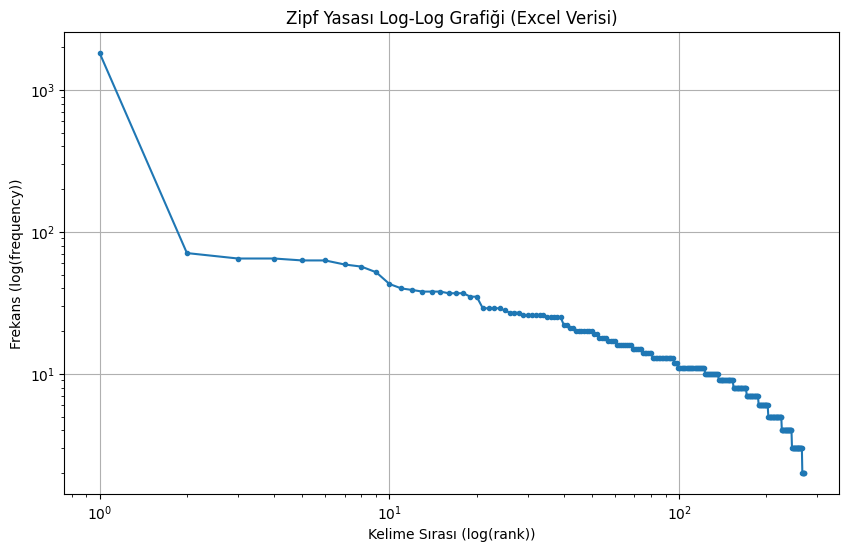

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Veriyi okuma


# singer_name sütununu al, NaN olanları çıkar ve string'e çevir
sentences = df['singer_name'].dropna().astype(str).tolist()

# Cümleleri küçük harfe çevir ve kelimelere ayır
corpus_lemmatized = [s.lower().split() for s in sentences]

# Tüm kelimeleri tek listeye topla
all_words = [word for sentence in corpus_lemmatized for word in sentence]

# Kelime frekanslarını hesapla
word_freq = Counter(all_words)

# Frekansları sırala (büyükten küçüğe)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Kelime sırasını oluştur (ranks)
ranks = np.arange(1, len(sorted_freq) + 1)

# Log-log grafiği çizildi
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()

                     0
0  Taylor Swift Lyrics
1  Taylor Swift Lyrics
2  Taylor Swift Lyrics
3  Taylor Swift Lyrics
4  Taylor Swift Lyrics


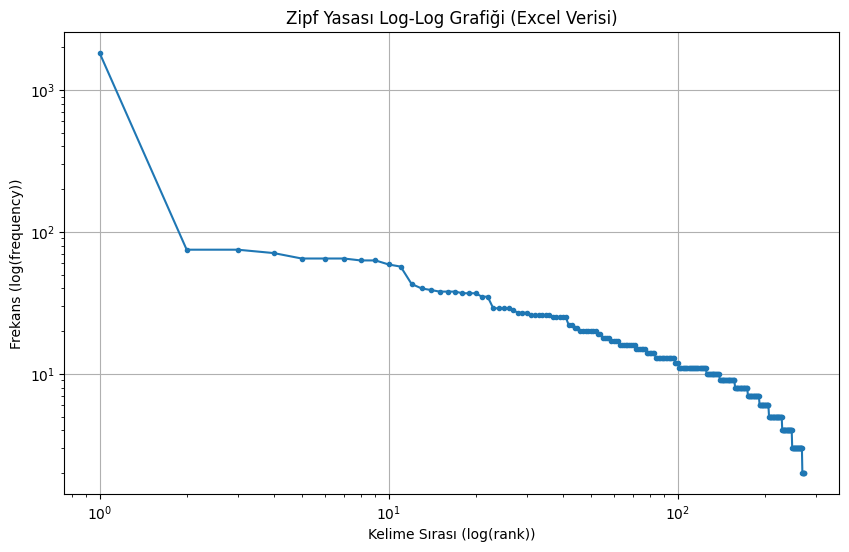

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences.xls", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()


                    0
0  taylor swift lyric
1  taylor swift lyric
2  taylor swift lyric
3  taylor swift lyric
4  taylor swift lyric


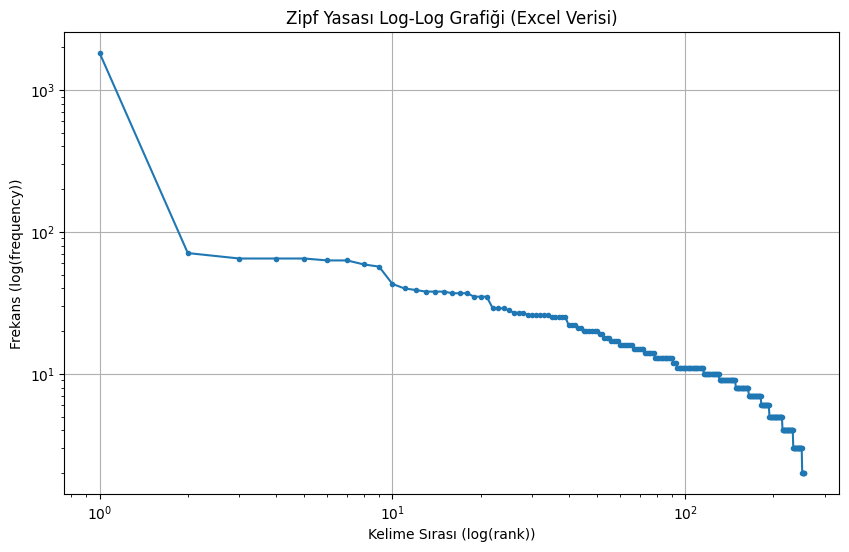

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences.xls", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()


In [ ]:
#Vektörleştirme (Vectorization)

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences.xls", header=None)

# Her satırı string olarak al (lemmatize edilmiş düz cümleler)
lemmatized_texts = df[0].astype(str).tolist()

# TF-IDF uygulaması
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(tfidf_df.head())

tfidf_df.to_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/tfidf_lemmatized.csv", index=False, encoding="utf-8-sig")

print("TF-IDF sonuçları 'tfidf_lemmatized.csv' dosyasına kaydedildi.")

    50  5sos  6ix9ine  adam  adams  adele  after  aguilera  air  akon  ...  \
0  0.0   0.0      0.0   0.0    0.0    0.0    0.0       0.0  0.0   0.0  ...   
1  0.0   0.0      0.0   0.0    0.0    0.0    0.0       0.0  0.0   0.0  ...   
2  0.0   0.0      0.0   0.0    0.0    0.0    0.0       0.0  0.0   0.0  ...   
3  0.0   0.0      0.0   0.0    0.0    0.0    0.0       0.0  0.0   0.0  ...   
4  0.0   0.0      0.0   0.0    0.0    0.0    0.0       0.0  0.0   0.0  ...   

   ward  weeknd  westlife  wham  white  whitney  williams  wit  wonder  yola  
0   0.0     0.0       0.0   0.0    0.0      0.0       0.0  0.0     0.0   0.0  
1   0.0     0.0       0.0   0.0    0.0      0.0       0.0  0.0     0.0   0.0  
2   0.0     0.0       0.0   0.0    0.0      0.0       0.0  0.0     0.0   0.0  
3   0.0     0.0       0.0   0.0    0.0      0.0       0.0  0.0     0.0   0.0  
4   0.0     0.0       0.0   0.0    0.0      0.0       0.0  0.0     0.0   0.0  

[5 rows x 262 columns]
TF-IDF sonuçları 'tfidf_lemmatize

In [155]:
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences.xls", header=None, dtype=str)
sentences = df[0].dropna().astype(str).tolist()
corpus_lemmatized = [s.lower().split() for s in sentences]

 #PARAMETRELER
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]
# MODEL EĞİTİM VE KAYIT
def train_and_save_model(corpus, params):
    model = Word2Vec(
        corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    name = f"lemmatized_model_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(name)
    print(f"{name} saved.")

# Modelleri eğit ve kaydet
for param in parameters:
    train_and_save_model(corpus_lemmatized, param)

# 3 örnek model yükle
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("lemmatized_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# Benzer kelimeleri yazdıran fonksiyon
def print_similar_words(model, model_name):
    try:
        similar = model.wv.most_similar('ariana', topn=3)
        print(f"\n{model_name} Modeli - 'ariana' ile En Benzer 3 Kelime:")
        for word, score in similar:
           print(f"Kelime: {word}, Benzerlik Skoru: {score}")
    except KeyError:
        print(f"\n{model_name}: 'ariana' kelimesi bu modelde yok.")

# Sonuçları göster
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")


lemmatized_model_cbow_window2_dim100.model saved.
lemmatized_model_skipgram_window2_dim100.model saved.
lemmatized_model_cbow_window4_dim100.model saved.
lemmatized_model_skipgram_window4_dim100.model saved.
lemmatized_model_cbow_window2_dim300.model saved.
lemmatized_model_skipgram_window2_dim300.model saved.
lemmatized_model_cbow_window4_dim300.model saved.
lemmatized_model_skipgram_window4_dim300.model saved.

Lemmatized CBOW Window 2 Dim 100 Modeli - 'ariana' ile En Benzer 3 Kelime:
Kelime: the, Benzerlik Skoru: 0.9186496734619141
Kelime: (, Benzerlik Skoru: 0.9131415486335754
Kelime: to, Benzerlik Skoru: 0.9113619327545166

Stemmed Skipgram Window 4 Dim 100 Modeli - 'ariana' ile En Benzer 3 Kelime:
Kelime: the, Benzerlik Skoru: 0.9803208112716675
Kelime: (, Benzerlik Skoru: 0.9791317582130432
Kelime: to, Benzerlik Skoru: 0.978471040725708

Lemmatized Skipgram Window 2 Dim 300 Modeli - 'ariana' ile En Benzer 3 Kelime:
Kelime: lyrics, Benzerlik Skoru: 0.9849300384521484
Kelime: (, B

In [169]:
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences.xls", header=None, dtype=str)
sentences = df[0].dropna().astype(str).tolist()
corpus_stemmed = [s.lower().split() for s in sentences]

 #PARAMETRELER
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]
# MODEL EĞİTİM VE KAYIT
def train_and_save_model(corpus, params):
    model = Word2Vec(
        corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    name = f"stemmed_model_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(name)
    print(f"{name} saved.")

# Modelleri eğit ve kaydet
for param in parameters:
    train_and_save_model(corpus_stemmed, param)
# 3 örnek model yükle
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("lemmatized_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")


# Benzer kelimeleri yazdıran fonksiyon
def print_similar_words(model, model_name):
    try:
        similar = model.wv.most_similar('Taylor Swift Lyrics', topn=3)
        print(f"\n{model_name} Modeli - 'Taylor Swift Lyrics' ile En Benzer 3 Kelime:")
        for word, score in similar:
           print(f"Kelime: {word}, Benzerlik Skoru: {score}")
    except KeyError:
        print(f"\n{model_name}: 'Taylor Swift Lyrics' kelimesi bu modelde yok.")

# Sonuçları göster
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")

stemmed_model_cbow_window2_dim100.model saved.
stemmed_model_skipgram_window2_dim100.model saved.
stemmed_model_cbow_window4_dim100.model saved.
stemmed_model_skipgram_window4_dim100.model saved.
stemmed_model_cbow_window2_dim300.model saved.
stemmed_model_skipgram_window2_dim300.model saved.
stemmed_model_cbow_window4_dim300.model saved.
stemmed_model_skipgram_window4_dim300.model saved.

Lemmatized CBOW Window 2 Dim 100: 'Taylor Swift Lyrics' kelimesi bu modelde yok.

Stemmed Skipgram Window 4 Dim 100: 'Taylor Swift Lyrics' kelimesi bu modelde yok.

Lemmatized Skipgram Window 2 Dim 300: 'Taylor Swift Lyrics' kelimesi bu modelde yok.


In [128]:
!pip install --upgrade xlrd


In [135]:
print(df_lemmatized.head())
print(df_stemmed.head())


                  type
0  Taylor Swift Lyrics
1  Taylor Swift Lyrics
2  Taylor Swift Lyrics
3  Taylor Swift Lyrics
4  Taylor Swift Lyrics
                 type
0  taylor swift lyric
1  taylor swift lyric
2  taylor swift lyric
3  taylor swift lyric
4  taylor swift lyric


In [149]:
#Bütün verilerin yüklenme aşaması
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer


# CSV dosyalarını yükle 
df_lemmatized = pd.read_csv("lemmatized_sentences.csv", 
                            header=None, names=["type"], 
                            quotechar='"', on_bad_lines='skip')

df_stemmed = pd.read_csv("stemmed_songs.csv", 
                         header=None, names=["type"], 
                         quotechar='"', on_bad_lines='skip')






In [150]:
# Sütun kontrolü
print("Lemmatized sütunlar:", df_lemmatized.columns.tolist())
print("Stemmed sütunlar:", df_stemmed.columns.tolist())

# TF-IDF modelini eğit
tfidf_lemmatized = TfidfVectorizer()
tfidf_lemmatized = tfidf_lemmatized.fit(df_lemmatized["type"].astype(str))



Lemmatized sütunlar: ['type']
Stemmed sütunlar: ['type']


In [171]:
# Sütun kontrolü
print("Lemmatized sütunlar:", df_lemmatized.columns.tolist())
print("Stemmed sütunlar:", df_stemmed.columns.tolist())

# TF-IDF modelini eğit
tfidf_lemmatized = TfidfVectorizer()
tfidf_lemmatized = tfidf_lemmatized.fit(df_lemmatized["type"].astype(str))
# Word2Vec modellerini yükle
w2v_models = {}
try:
    w2v_models['lemmatized_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window2_dim100.model")
    w2v_models['lemmatized_model_cbow_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window2_dim300.model")
    w2v_models['lemmatized_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window4_dim100.model")
    w2v_models['lemmatized_model_cbow_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window4_dim300.model")
    w2v_models['lemmatized_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window2_dim100.model")
    w2v_models['lemmatized_model_skipgram_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window4_dim300.model")
    w2v_models['lemmatized_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window4_dim100.model")
    w2v_models['lemmatized_model_skipgram_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window4_dim300.model")
    
    w2v_models['stemmed_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window2_dim100.model")
    w2v_models['stemmed_model_cbow_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window2_dim300.model")
    w2v_models['stemmed_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window4_dim100.model")
    w2v_models['stemmed_model_cbow_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window4_dim300.model")
    
    w2v_models['stemmed_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window2_dim100.model")
    w2v_models['stemmed_model_skipgram_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window2_dim300.model")
    w2v_models['stemmed_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window4_dim100.model")
    w2v_models['stemmed_model_skipgram_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window4_dim300.model")
except FileNotFoundError as e:
    print("Model dosyası bulunamadı:", e)

Lemmatized sütunlar: ['type']
Stemmed sütunlar: ['type']
Model dosyası bulunamadı: [Errno 2] No such file or directory: 'C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model/stemmed_model_cbow_window4_dim300.model'


In [163]:
#tfidf_lemmatized Benzerlik hesaplama (cosine similarity)
index = 100  
input_text = df_lemmatized.iloc[index]["type"]
input_vec = tfidf_lemmatized.transform([input_text])
all_vecs = tfidf_lemmatized.transform(df_lemmatized["type"].astype(str))
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(input_vec, all_vecs)[0]
# En yüksek 5 skoru (kendisi hariç)
top_indices = similarities.argsort()[::-1][1:6]
print(f"Giriş Tweet (#{index}):", input_text)
print("\nEn Benzer 5 Type ve Benzerlik Skorları:\n")

for i, idx in enumerate(top_indices, 1):
    print(f"{i}. type (#{idx}): {df_lemmatized.iloc[idx]['type']}")
    print(f"Benzerlik Skoru: {similarities[idx]:.4f}")
    print("-" * 60)

Giriş Tweet (#100): Justin Timberlake Lyrics

En Benzer 5 Type ve Benzerlik Skorları:

1. type (#104): Justin Timberlake Lyrics
Benzerlik Skoru: 1.0000
------------------------------------------------------------
2. type (#103): Justin Timberlake Lyrics
Benzerlik Skoru: 1.0000
------------------------------------------------------------
3. type (#101): Justin Timberlake Lyrics
Benzerlik Skoru: 1.0000
------------------------------------------------------------
4. type (#100): Justin Timberlake Lyrics
Benzerlik Skoru: 1.0000
------------------------------------------------------------
5. type (#99): Justin Timberlake Lyrics
Benzerlik Skoru: 1.0000
------------------------------------------------------------


In [164]:
#tfidf_stemmed Benzerlik hesaplama (cosine similarity)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_stemmed = TfidfVectorizer()
tfidf_stemmed = tfidf_stemmed.fit(df_stemmed["type"].astype(str))
index = 100
input_text = df_stemmed.iloc[index]["type"]
input_vec = tfidf_stemmed.transform([input_text])
all_vecs = tfidf_stemmed.transform(df_stemmed["type"].astype(str))
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(input_vec, all_vecs)[0]
top_indices = similarities.argsort()[::-1][1:6]  # Kendisi hariç en benzer 5
print(f"Giriş Type (#{index}):", input_text)
print("\nEn Benzer 5 Type ve Benzerlik Skorları:\n")

for i, idx in enumerate(top_indices, 1):
    print(f"{i}. Type (#{idx}): {df_stemmed.iloc[idx]['type']}")
    print(f"Benzerlik Skoru: {similarities[idx]:.4f}")
    print("-" * 60)


Giriş Type (#100): justin timberlak lyric futuresex lovesound album

En Benzer 5 Type ve Benzerlik Skorları:

1. Type (#101): justin timberlak lyric experi album
Benzerlik Skoru: 0.4970
------------------------------------------------------------
2. Type (#102): justin timberlak lyric experi album
Benzerlik Skoru: 0.4970
------------------------------------------------------------
3. Type (#104): justin timberlak lyric song song
Benzerlik Skoru: 0.4895
------------------------------------------------------------
4. Type (#99): justin timberlak lyric justifi album
Benzerlik Skoru: 0.4676
------------------------------------------------------------
5. Type (#103): justin timberlak lyric man wood album
Benzerlik Skoru: 0.4138
------------------------------------------------------------


In [165]:
#Word2Vec Benzerliği
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def avg_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Giriş tweet indeksini belirlemek için kullanılan kod
index = 100
input_lemma = df_lemmatized.iloc[index]["type"]
input_stem = df_stemmed.iloc[index]["type"]

# Sonuçları listeye kaydetme
all_results = []

for model_name, model in w2v_models.items():
    print(f"\n Model: {model_name}")
    
    # Hangi veriyle çalışacağımızı ayırrıyoruz
    if "lemmatized" in model_name:
        dataset = df_lemmatized
        input_text = input_lemma
    else:
        dataset = df_stemmed
        input_text = input_stem

    # Giriş tweet'inin vektörü
    input_vec = avg_vector(input_text, model).reshape(1, -1)

    # Tüm tweetlerin ortalama vektörleri
    all_vecs = np.array([avg_vector(text, model) for text in dataset["type"]])

    # Cosine similarity hesaplama
    similarities = cosine_similarity(input_vec, all_vecs)[0]
    top_indices = similarities.argsort()[::-1][1:6]  # ilk 5 benzer tweet (kendisi hariç)

    print(f"Giriş Type: {input_text}")
    top_tweets = []
    top_scores = []
    for i, idx in enumerate(top_indices, 1):
        tweet = dataset.iloc[idx]["type"]
        score = similarities[idx]
        print(f"{i}. Tweet: {tweet}")
        print(f"   Skor: {score:.4f}")
        top_tweets.append(type)
        top_scores.append(round(score, 4))

    avg_score = round(np.mean(top_scores), 4)
    print(f" Ortalama Skor: {avg_score}")
    print("-" * 70)

    all_results.append({
        "model": model_name,
        "avg_score": avg_score,
        "top_indices": top_indices.tolist(),
        "top_scores": top_scores,
        "top_tweets": top_tweets
    })



 Model: lemmatized_model_cbow_window2_dim100
Giriş Type: Justin Timberlake Lyrics
1. Tweet: Chris Brown Lyrics
   Skor: 0.0000
2. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
3. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
4. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
5. Tweet: Bruno Mars Lyrics
   Skor: 0.0000
 Ortalama Skor: 0.0
----------------------------------------------------------------------

 Model: lemmatized_model_cbow_window2_dim300
Giriş Type: Justin Timberlake Lyrics
1. Tweet: Chris Brown Lyrics
   Skor: 0.0000
2. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
3. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
4. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
5. Tweet: Bruno Mars Lyrics
   Skor: 0.0000
 Ortalama Skor: 0.0
----------------------------------------------------------------------

 Model: lemmatized_model_cbow_window4_dim100
Giriş Type: Justin Timberlake Lyrics
1. Tweet: Chris Brown Lyrics
   Skor: 0.0000
2. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
3. Tweet: Bon Jovi Lyrics
   Skor: 0.0000
4. Tweet: 

In [ ]:
1-"C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_skipgram_window2_dim100.model"
4-"C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_skipgram_window4_dim100.model"
2-"C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_skipgram_window2_dim300.model"
3-"C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_skipgram_window4_dim300.model"
1."C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_cbow_window2_dim300.model"
3."C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_cbow_window4_dim100.model"
2."C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_cbow_window2_dim100.model"
4."C:\Users\ZüMeYrA\OneDrive\Desktop\lemmatized_model_cbow_window4_dim300.model"
